In [247]:
import os
import cv2
import cv2
import pylab
import numpy as np
import matplotlib.pyplot as plt
import scipy
from pylab import xticks,yticks,np
from scipy.interpolate import make_interp_spline

# 读取文件夹内的所有文件的路径
def read_file_name(file_dir):
    list_path =[]  # 文件路径
    list_name = []  # 文件名
    for root, dirs, files in os.walk(file_dir):
        """
        print(root)  # 当前目录路径
        print(dirs)  # 当前路径下所有文件夹
        print(files)  # 当前路径下所有文件
       """
        path = root
        if len(dirs) == 0:  # 该目录下不存在文件夹
            for file in files:
                path1 = path + '//' + file
                # print(path1)
                list_path.append(path1)
                list_name.append(file)
        else:  # 该目录下存在文件夹
            for dir1 in dirs:
                path = path + '//' + dir1
                for file in files:
                    path1 = path + '//' + file
                    # print(path1)
                    list_path.append(path1)
                    list_name.append(file)
    return list_path, list_name


# 读取所有图片的路径




In [248]:
def get_red_point(img):
    grid_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # 从RGB色彩空间转换到HSV色彩空间
    grid_HSV = cv2.cvtColor(grid_RGB, cv2.COLOR_RGB2HSV)

    # H、S、V范围一：
    lower1 = np.array([0,43,46])
    upper1 = np.array([10,255,255])
    mask1 = cv2.inRange(grid_HSV, lower1, upper1)       # mask1 为二值图像
    res1 = cv2.bitwise_and(grid_RGB, grid_RGB, mask=mask1)

    # H、S、V范围二：
    lower2 = np.array([156,43,46])
    upper2 = np.array([180,255,255])
    mask2 = cv2.inRange(grid_HSV, lower2, upper2)
    res2 = cv2.bitwise_and(grid_RGB,grid_RGB, mask=mask2)

    # 将两个二值图像结果 相加
    mask3 = mask1 + mask2
    return mask3
def get_red_contour(img):
    # cv2.threshold：参数1是源图片, 参数2是阈值, 参数3是填充色, 参数4是阈值类型
    ret, thresh = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY)
    black = cv2.cvtColor(np.zeros((img.shape[1], img.shape[0]), dtype=np.uint8), cv2.COLOR_GRAY2BGR)
    num_count=0
    coordinate=[]
    _,contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        if (cv2.contourArea(cnt) <100 ):
            continue
        epsilon = 0.01 * cv2.arcLength(cnt,True)
        # cv2.approxPolyDP：参数1是轮廓，参数2是epsilon值，表源轮廓与近似多边形的最大差值，参数3是布尔标记，表示多边形是否闭合
        approx = cv2.approxPolyDP(cnt,epsilon,True)
        hull = cv2.convexHull(cnt) # 获取处理过的轮廓信息
        #
        x, y, w, h = cv2.boundingRect(cnt)
        if(w<60):
            cv2.drawContours(black, [cnt], -1, (0, 255, 0), thickness=-1)
            num_count=num_count+1
            coordinate.append([y,x,w,h])
    #print(num_count)
    return black,coordinate
def get_main_contour(img):
    # cv2.threshold：参数1是源图片, 参数2是阈值, 参数3是填充色, 参数4是阈值类型
    ret, thresh = cv2.threshold(cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY) , 127, 255, cv2.THRESH_BINARY)
    black = cv2.cvtColor(np.zeros((img.shape[1], img.shape[0]), dtype=np.uint8), cv2.COLOR_GRAY2BGR)

    _,contours, hier = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        if (cv2.contourArea(cnt) < 500 ):
            continue
        epsilon = 0.01 * cv2.arcLength(cnt,True)
        # cv2.approxPolyDP：参数1是轮廓，参数2是epsilon值，表源轮廓与近似多边形的最大差值，参数3是布尔标记，表示多边形是否闭合
        approx = cv2.approxPolyDP(cnt,epsilon,True)
        hull = cv2.convexHull(cnt) # 获取处理过的轮廓信息
        cv2.drawContours(black, [cnt], -1, (0, 255, 0), thickness=-1)
        #cv2.drawContours(black, [approx], -1, (255, 255, 0), 2)
        #cv2.drawContours(black, [hull], -1, (0, 0, 255), 2)
    kernel = np.ones(shape=[3,3],dtype=np.uint8)
    black = cv2.erode(black,kernel=kernel)  # 腐蚀操作
    return black
def findcore(coordinates):
    
    cores=[]
    for coordinate in coordinates:
        x = coordinate[1]+coordinate[2]/2
        y = coordinate[0]+coordinate[3]/2
        cores.append([x,y])

    return np.array(cores)

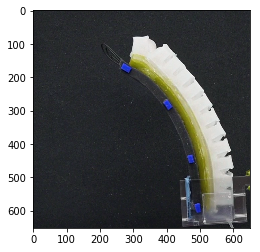

In [249]:
example_path='cut_video/armframe/554.jpg'
example_img=cv2.imread(example_path)
aa=np.array(example_img)
plt.imshow(aa)

##  获取像素点位

In [250]:
example_path='cut_video/armframe//533.jpg'
example_img=cv2.imread(example_path)
example_img=cv2.resize(example_img,(300,300))
redpart=get_red_point(example_img)
redcontour,coord=get_red_contour(redpart)
main_contour=get_main_contour(example_img)
final_img=main_contour+redcontour


In [251]:
coord
core=findcore(coord)

In [252]:
core

array([[225. , 275.5],
       [218.5, 204.5],
       [191.5, 128.5],
       [140. ,  71. ]])

In [253]:


coord=np.array(coord)
coord=coord.flatten()
print(coord)

[260 215  20  31 197 212  13  15 120 184  15  17  63 131  18  16]


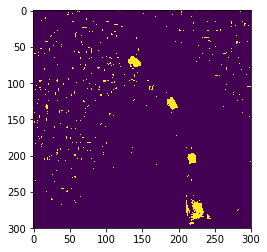

In [254]:
plt.imshow(redpart)

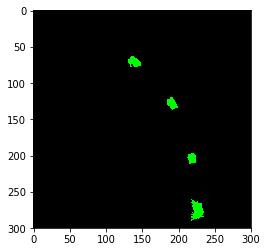

In [12]:
plt.imshow(redcontour)

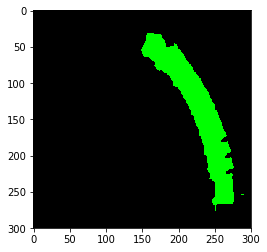

In [16]:
plt.imshow(main_contour)

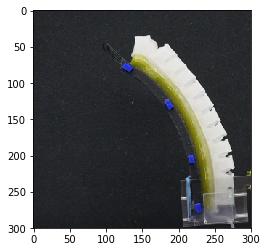

In [14]:
#f'姓名：{name} 年龄：{age} 性别：{gender}'
name=f'cut_video/armframe//{551}.jpg'
example_img=cv2.imread(name)
example_img=cv2.resize(example_img,(300,300))
plt.imshow(example_img)

In [12]:
no_use=np.random.randint(low=1, high=1260, size=490, dtype='l')
no_use.shape

(490,)

In [13]:
path_original = "cut_video/armframe"  # 原文件夹
path_target = "cut_video/contours"  # 目标文件夹
file_path, file_name = read_file_name(path_original)
print(file_path[1])
cores=[]
nums=0
for num in range(1,1260):
    # 读取图片
    if num in no_use:
        continue
    name=f'cut_video/armframe//{num}.jpg'
    #print("当前是第%s",name)
    example_img=cv2.imread(name)
    example_img=cv2.resize(example_img,(300,300))
    redpart=get_red_point(example_img)
    redcontour,coord=get_red_contour(redpart)
    core=findcore(coord)
    core=core.flatten()
    cores.append(core)
    main_contour=get_main_contour(example_img)
    final_img=main_contour+redcontour
    path_save = f'{path_target}/{num}.jpg'
    cv2.imwrite(path_save,final_img)
    nums=nums+1
    
print("执行结束。生成照片个数为：",nums)


cut_video/armframe//10.jpg
执行结束。生成照片个数为： 861


In [14]:
nums

861

In [15]:
cores=np.array(cores)
cores.shape

(861, 8)

In [16]:
np.savetxt( "marker_position.csv", cores, delimiter="," )

## 提取骨架


In [17]:
main_contour.shape

(300, 300, 3)

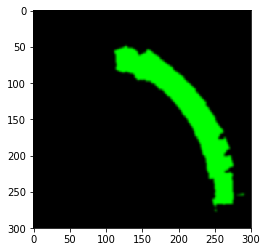

In [469]:
example_path='cut_video/armframe//753.jpg'
example_img=cv2.imread(example_path)
example_img=cv2.resize(example_img,(300,300))


main_contour=get_main_contour(example_img)
main_contour = cv2.GaussianBlur(main_contour,(7,7),0)
plt.imshow(main_contour)


In [256]:
gray.shape

(300, 300)

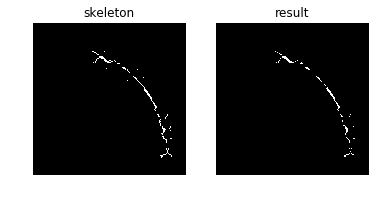

In [543]:
img = main_contour
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 灰度图像
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)

dst = binary.copy()
skeleton = np.zeros(gray.shape, np.uint8)  # 创建空骨架图
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7,7 ))
while (True):
    dst = cv2.erode(dst, kernel, None, None, 1)  # 腐蚀
    opening = cv2.morphologyEx(dst, cv2.MORPH_OPEN, kernel)  # 开运算
    subSkeleton = cv2.subtract(dst, opening)  # 获得骨架子集
    skeleton = cv2.bitwise_or(skeleton, subSkeleton)  # 将删除的像素添加到骨架图
    if cv2.countNonZero(dst) == 0:
        break

result = cv2.bitwise_xor(gray, skeleton)

skeleton1 = cv2.medianBlur(skeleton, 3)
# plt.figure(figsize=(9, 6))
# plt.subplot(131), plt.axis('off'), plt.title("origin")
# plt.imshow(gray, cmap='gray')
plt.subplot(121), plt.axis('off'), plt.title("skeleton")
plt.imshow(skeleton, cmap='gray')
plt.subplot(122), plt.axis('off'), plt.title("result")
plt.imshow(skeleton1, cmap='gray')
# plt.tight_layout()
# plt.show()


In [379]:
skeleton1.shape

(300, 300)

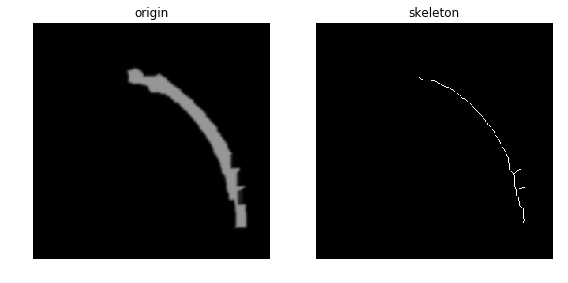

In [534]:
# 图片细化（骨架提取）单张图片处理
from skimage import morphology
imgGray = main_contour  # flags=0 灰度图像
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones(shape=[15,12],dtype=np.uint8)
imgGray= cv2.erode(imgGray,kernel=kernel)
ret, imgBin = cv2.threshold(imgGray, 127, 255, cv2.THRESH_BINARY)  # 二值化处理
imgBin[imgBin==255] = 1
skeleton01 = morphology.skeletonize(imgBin)
skeleton = skeleton01.astype(np.uint8) * 255

plt.figure(figsize=(8, 6))
plt.subplot(121), plt.axis('off'), plt.title("origin")
plt.imshow(imgGray, cmap='gray', vmin=0, vmax=255)
plt.subplot(122), plt.title("skeleton"), plt.axis('off')
plt.imshow(skeleton, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()


In [544]:
_, binary = cv2.threshold(skeleton1, 230, 255,cv2.THRESH_BINARY)

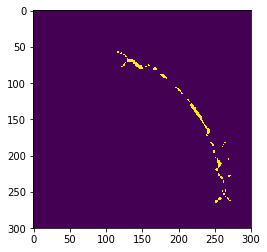

In [545]:
plt.imshow(binary)

In [546]:
binary.shape

(300, 300)

In [547]:
_,contours, hier = cv2.findContours(binary,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [548]:
contours=np.array(contours)
contours[2].shape


(15, 1, 2)

In [540]:
contours[0].reshape(-1,2)

array([[129,  69],
       [130,  69],
       [133,  72],
       [135,  72],
       [136,  73],
       [144,  73],
       [145,  74],
       [150,  74],
       [151,  75],
       [152,  75],
       [153,  76],
       [154,  76],
       [155,  77],
       [156,  77],
       [158,  79],
       [159,  79],
       [160,  80],
       [161,  80],
       [162,  81],
       [164,  81],
       [165,  82],
       [167,  82],
       [169,  84],
       [170,  84],
       [171,  85],
       [172,  85],
       [173,  86],
       [174,  86],
       [176,  88],
       [177,  88],
       [185,  96],
       [187,  96],
       [193, 102],
       [194, 102],
       [198, 106],
       [198, 107],
       [211, 120],
       [211, 121],
       [214, 124],
       [214, 125],
       [217, 128],
       [217, 129],
       [221, 133],
       [221, 134],
       [225, 138],
       [225, 139],
       [226, 140],
       [226, 142],
       [229, 145],
       [229, 146],
       [231, 148],
       [231, 149],
       [232,

In [541]:
coord=[]
for contour in contours:
    for pos in contour:
        coord.append(pos.reshape(-1,2))
    

In [521]:
coord=np.array(coord)
coord=coord.reshape(-1,2)
coord.shape

(194, 2)

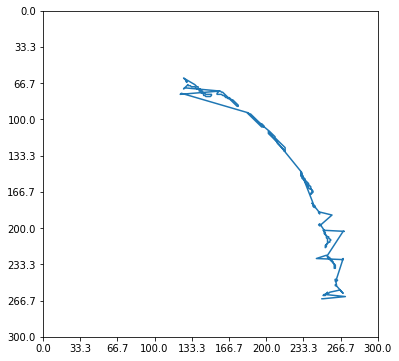

In [522]:
plt.figure(figsize=(6, 6))
ax = plt.gca() 

plt.plot(coord[:,0], coord[:,1])
xticks(np.linspace(0,300,10,endpoint=True))
yticks(np.linspace(0,300,10,endpoint=True))
ax.invert_yaxis()
plt.show()

In [523]:
coord=np.array(coord)
coord=coord.reshape(-1,2)

In [524]:
coordx,indice = np.array(np.unique(coord[:,0],return_index=True))
coord=coord[indice]

In [525]:
coord.shape

(84, 2)

In [526]:
coordx,indice = np.array(np.unique(coord[:,1],return_index=True))
data=coord[indice]

In [527]:
data.shape

(55, 2)

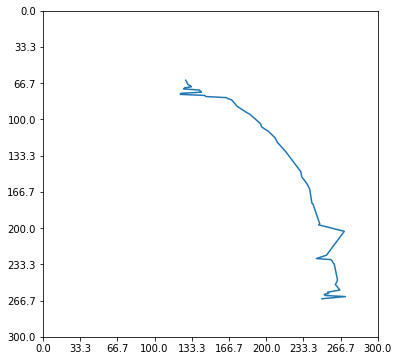

In [516]:
plt.figure(figsize=(6, 6))
ax = plt.gca() 

plt.plot(data[:,0], data[:,1])
xticks(np.linspace(0,300,10,endpoint=True))
yticks(np.linspace(0,300,10,endpoint=True))
ax.invert_yaxis()
plt.show()

## 曲线平滑处理

In [528]:
x_smooth = np.linspace(data[:,0].min(), data[:,0].max(), 80)  # np.linspace 等差数列,从x.min()到x.max()生成300个数，便于后续插值
y_smooth = make_interp_spline(data[:,0], data[:,1])(x_smooth)

ValueError: Expect x to be a 1-D sorted array_like.

In [434]:
x_smooth.shape

(80,)

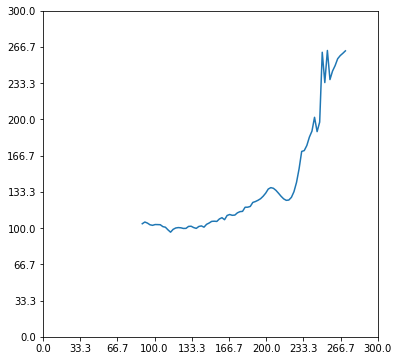

In [435]:
plt.figure(figsize=(6, 6))
plt.plot(x_smooth, y_smooth)
xticks(np.linspace(0,300,10,endpoint=True))
yticks(np.linspace(0,300,10,endpoint=True))
plt.show()


([<matplotlib.axis.YTick at 0x1c23344780>,
 <a list of 10 Text yticklabel objects>)

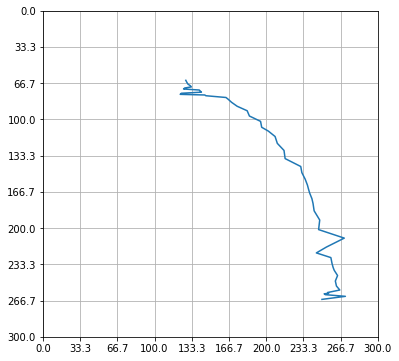

In [530]:
y= scipy.signal.savgol_filter(data[:,1], 11, 3, mode= 'interp')
plt.figure(figsize=(6, 6))
plt.grid(True)#生成网格
# plt.subplot(121)
# plt.plot(x_smooth,y_smooth)
# ax = plt.gca()
# ax.invert_yaxis() #y轴反向
# plt.subplot(122)
ax = plt.gca()
plt.plot(data[:,0],y)
ax.invert_yaxis()
  #y轴反向
xticks(np.linspace(0,300,10,endpoint=True))
yticks(np.linspace(0,300,10,endpoint=True))

           3           2
3.796e-05 x - 0.01128 x + 1.041 x + 73.24


ValueError: x and y must have same first dimension, but have shapes (80,) and (89,)

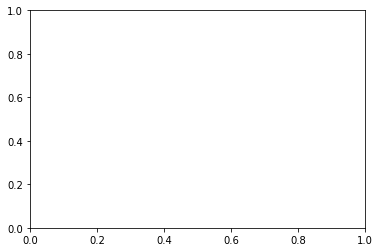

In [442]:
z1 = np.polyfit(data[:,0], y, 3)              # 曲线拟合，返回值为多项式的各项系数
p1 = np.poly1d(z1)  
print(p1)
x=x_smooth
y_pred = p1(x)                        # 根据函数的多项式表达式，求解 y
# print(np.polyval(p1, 29))             根据多项式求解特定 x 对应的 y 值
# print(np.polyval(z1, 29))             根据多项式求解特定 x 对应的 y 值

plot1 = pylab.plot(x, y, '*', label='original values')
plot2 = pylab.plot(x, y_pred, 'r', label='fit values')
pylab.title('')
pylab.xlabel('')
pylab.ylabel('')
pylab.legend(loc=3, borderaxespad=0., bbox_to_anchor=(0, 0))
pylab.show()
pylab.savefig('p1.png', dpi=200, bbox_inches='tight')


In [542]:
data=coord
z1 = np.polyfit(data[:,0], data[:,1], 3)              # 曲线拟合，返回值为多项式的各项系数
p1 = np.poly1d(z1)  
print(p1)
x=data[:,0]
y_pred = p1(x)                        # 根据函数的多项式表达式，求解 y
# print(np.polyval(p1, 29))             根据多项式求解特定 x 对应的 y 值
# print(np.polyval(z1, 29))             根据多项式求解特定 x 对应的 y 值


plt.figure(figsize=(6, 6))
ax = plt.gca() 
#plt.plot(data[:,0], data[:,1])
plt.plot(data[:,0], y_pred)
xticks(np.linspace(0,300,10,endpoint=True))
yticks(np.linspace(0,300,10,endpoint=True))
ax.invert_yaxis()
plt.show()

TypeError: list indices must be integers or slices, not tuple

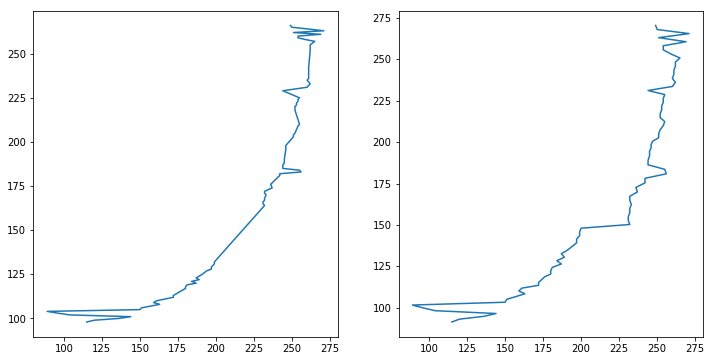

In [334]:
y= scipy.signal.savgol_filter(data[:,1], 35, 1, mode= 'interp')
plt.figure(figsize=(12, 6))
ax = plt.gca()
plt.subplot(121)
plt.plot(data[:,0],data[:,1])
ax.invert_yaxis()  #y轴反向
plt.subplot(122)
plt.plot(data[:,0],y)

ax.invert_yaxis()  #y轴反向
# xticks(np.linspace(0,300,10,endpoint=True))
# yticks(np.linspace(0,300,10,endpoint=True))

In [171]:
def calculate_curvature(x_value: np.ndarray, y_value: np.ndarray):
    """计算曲率"""
    x_t = np.gradient(x_value)
    y_t = np.gradient(y_value)
    xx_t = np.gradient(x_t)
    yy_t = np.gradient(y_t)
    curvature_val = np.abs(xx_t * y_t - x_t * yy_t) / (x_t * x_t + y_t * y_t) ** 1.5
    return curvature_val
cur = calculate_curvature(x_smooth,y)
cur.shape

(86,)

In [173]:
cur.mean()

0.0075189212422140965